In [1]:
# Import necessary packages.
import numpy as np
import pandas as pd
import torch
import os
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image
# "ConcatDataset" and "Subset" are possibly useful when doing semi-supervised learning.
from torch.utils.data import ConcatDataset, DataLoader, Subset, Dataset
from torchvision.datasets import DatasetFolder, VisionDataset

# This is for the progress bar.
from tqdm.auto import tqdm
import random
import torch.nn.functional as F
from dataset import SpineDataset_Test
import albumentations as A
from albumentations.pytorch import ToTensorV2
import matplotlib.pyplot as plt
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
#from model import unet_model , 
from models.U2net import U2NET
from models.Unet import unet_model

t1 = A.Compose([
    A.augmentations.transforms.CLAHE(),
    A.Resize(1024,512),
    ToTensorV2()
])
data = []

In [2]:
with open("test_1_30_AP.txt")as f:
    d  = f.read().splitlines()
for i in d:
    tmp = "./testing/" + i
    data.append(tmp)

In [3]:
test_dataset = SpineDataset_Test(data,t1)

In [4]:
test_batch = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False, pin_memory=True)


In [5]:
model = unet_model().to(DEVICE)
model.load_state_dict(torch.load(f"checkpoint/unet/0.6607674749561321_best_resnetlarge.ckpt"))
# model = U2NET().to(DEVICE)
# model.load_state_dict(torch.load(f"checkpoint/axial/0.8863151219611287_best_resnetlarge.ckpt"))

<All keys matched successfully>

In [6]:
model.eval()

unet_model(
  (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv1): encoding_block(
    (conv): Sequential(
      (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (conv2): encoding_block(
    (conv): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine

In [7]:
import cv2

In [8]:
# kettt = 0
# visualize = np.zeros((3,1024,512))
#     0:  [255, 255, 255],
# cls_color = {
#     1:  [0 , 0 , 255],
#     2:  [0, 153, 0],
#     3:  [57, 217, 249],
#     4:  [255, 128, 0],
#     5:  [204, 153, 255],
#     6: [255, 255, 0],
# }
# with torch.no_grad():
#     for x,path_name in test_batch:
#         write_name = path_name[0].split("/")[-1]
#         print(write_name)
#         if kettt==1:
#             print("break")
#             break
#         softmax = nn.Softmax(dim=1)
#         x = x.float().to(DEVICE)
#         preds = torch.argmax(softmax(model(x)),axis=1).to('cpu')
#         uni_data = np.unique(preds)
#         #if(len(uni_data)!=8):
#         if (len(uni_data)==7 and 7 not in uni_data):
#             print(path_name)
#             #fig , ax =  plt.subplots(1,2 , figsize=(4, 8))

#             img1 = np.transpose(np.array(x[0,:,:,:].to('cpu')),(1,2,0))
#             preds1 = np.array(preds[0,:,:])
            
#             img1 = cv2.cvtColor(img1 , cv2.COLOR_GRAY2BGR)
#             img1 = np.array(img1).transpose(2,0,1)
#             #preds1 = ((preds1/np.max(preds1))*255).astype(np.uint8)
#             for i in range(len(preds1)):
#                 for j in range(len(preds1[0])):
#                     if(preds1[i][j]==0):
#                         continue
#                     #print(preds1[i][j])
#                     cmap = cls_color[preds1[i][j]]
#                     for index in range(3):
#                         img1[index][i][j] = cmap[index]
#             img1 = img1.transpose(1,2,0)
#             cv2.imwrite(f"./result/pass/{write_name}",img1)
#             print(path_name)

#             #ax[0].set_title('Image')
#             #ax[1].set_title('Prediction')
#             #ax[0].imshow(img1)
#             #ax[1].imshow(preds1)
#             print(uni_data)
#             kettt+=1
#             #plt.show()

In [9]:
kettt = 0
visualize = np.zeros((3,1024,512))
cls_color = {
    0:  [255, 255, 255],
    1:  [0 , 0 , 255],
    2:  [0, 153, 0],
    3:  [57, 217, 249],
    4:  [255, 128, 0],
    5:  [204, 153, 255],
    6: [255, 255, 0],
}
with torch.no_grad():
    for x,path_name in test_batch:
        write_name = path_name[0].split("/")[-1]
        softmax = nn.Softmax(dim=1)
        x = x.float().to(DEVICE)
        preds = torch.argmax(softmax(model(x)),axis=1).to('cpu')
        uni_data = np.unique(preds)
        img1 = np.transpose(np.array(x[0,:,:,:].to('cpu')),(1,2,0))
        preds1 = np.array(preds[0,:,:])
        
        img1 = cv2.cvtColor(img1 , cv2.COLOR_GRAY2BGR)
        img1 = np.array(img1).transpose(2,0,1)
        for i in range(len(preds1)):
            for j in range(len(preds1[0])):
                if(preds1[i][j]==0):
                    continue
                #print(preds1[i][j])
                cmap = cls_color[preds1[i][j]]
                for index in range(3):
                    img1[index][i][j] = cmap[index]
        img1 = img1.transpose(1,2,0)
        if (len(uni_data)==7):
            cv2.imwrite(f"./AP_result_1_30/pass/{write_name}",img1)
        else:
            cv2.imwrite(f"./AP_result_1_30/notp/{write_name}",img1)

In [8]:
# kettt = 0
# visualize = np.zeros((3,1024,512))
# cls_color = {
#     0:  [255, 255, 255],
#     1:  [0 , 0 , 255],
#     2:  [0, 153, 0],
#     3:  [57, 217, 249],
#     4:  [255, 128, 0],
#     5:  [204, 153, 255],
#     6: [255, 255, 0],
#     7: [255,0,255],
#     8: [0,255,0]
# }
# with torch.no_grad():
#     for x,path_name in test_batch:
#         write_name = path_name[0].split("/")[-1]
#         softmax = nn.Softmax(dim=1)
#         x = x.float().to(DEVICE)
#         preds = torch.argmax(softmax(model(x)),axis=1).to('cpu')
#         uni_data = np.unique(preds)
#         img1 = np.transpose(np.array(x[0,:,:,:].to('cpu')),(1,2,0))
#         preds1 = np.array(preds[0,:,:])
        
#         img1 = cv2.cvtColor(img1 , cv2.COLOR_GRAY2BGR)
#         img1 = np.array(img1).transpose(2,0,1)
#         for i in range(len(preds1)):
#             for j in range(len(preds1[0])):
#                 if(preds1[i][j]==0):
#                     continue
#                 #print(preds1[i][j])
#                 cmap = cls_color[preds1[i][j]]
#                 for index in range(3):
#                     img1[index][i][j] = cmap[index]
#         img1 = img1.transpose(1,2,0)
#         if (len(uni_data)==9):
#             cv2.imwrite(f"./LA_result_1_9/pass/3-{write_name}",img1)
#         else:
#             cv2.imwrite(f"./LA_result_1_9/notp/3-{write_name}",img1)

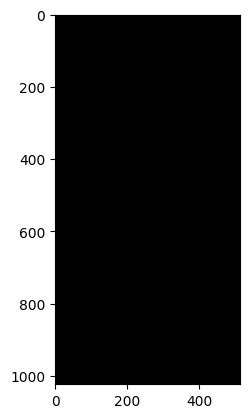

In [10]:
a = visualize.transpose(1,2,0)
plt.imshow(a)

In [11]:
with open("test_data.txt",'r') as f:
    data = f.read().splitlines()

In [59]:
data

['./FO-258218491416838431_json',
 './FO-112139868677800148_json',
 './FO-256791920264072115_json',
 './FO-328335381031203413_json',
 './FO-359284993441545309_json',
 './FO-410298935991288946_json',
 './FO-466248626243795334_json',
 './FO-233184483539218267_json',
 './FO-133976320887897066_json',
 './FO-156825371612939435_json',
 './FO-67381337186147040_json',
 './FO-134373398370302530_json',
 './FO-143377828446722768_json',
 './FO-136713378132396782_json',
 './FO-313299493256870356_json',
 './FO-23478819242459063_json',
 './FO-444942760936986867_json']

In [22]:
a = torch.randn(4, 4,5)

In [23]:
a

tensor([[[ 0.1775,  0.6411, -1.0254, -0.3542,  2.2775],
         [ 2.1395, -0.0333, -0.7079, -0.0554, -0.1459],
         [ 0.2076,  0.1099, -0.0083, -0.3885,  1.0232],
         [-0.6194, -0.7919, -1.8684,  0.3775,  1.3191]],

        [[ 0.5148,  0.5900, -0.0950,  0.0259,  1.5635],
         [-0.3137, -0.6220,  0.0441, -1.6741, -1.5202],
         [ 1.1708, -0.0928,  0.6796, -0.8270,  0.5435],
         [ 0.4681, -2.1394, -0.2511, -0.5473,  0.9570]],

        [[-0.3946, -0.1269,  0.6953,  2.2773, -0.3555],
         [ 1.7181, -1.7014, -0.2699,  2.4515, -0.8044],
         [ 0.0914, -0.2268,  0.2704, -1.1136, -2.6765],
         [-0.1988,  1.7733,  0.1729, -0.5491, -1.5121]],

        [[ 0.6188, -0.4705,  0.2686, -0.1335,  0.2923],
         [-2.2499,  0.7664, -0.0121,  1.1574, -1.0570],
         [-0.3084,  1.6010, -1.1174, -1.4205, -2.2181],
         [-0.6761, -0.5214, -0.1795,  0.0117, -1.1420]]])

In [24]:
a = a.view(4,-1)


In [25]:
a

tensor([[ 0.1775,  0.6411, -1.0254, -0.3542,  2.2775,  2.1395, -0.0333, -0.7079,
         -0.0554, -0.1459,  0.2076,  0.1099, -0.0083, -0.3885,  1.0232, -0.6194,
         -0.7919, -1.8684,  0.3775,  1.3191],
        [ 0.5148,  0.5900, -0.0950,  0.0259,  1.5635, -0.3137, -0.6220,  0.0441,
         -1.6741, -1.5202,  1.1708, -0.0928,  0.6796, -0.8270,  0.5435,  0.4681,
         -2.1394, -0.2511, -0.5473,  0.9570],
        [-0.3946, -0.1269,  0.6953,  2.2773, -0.3555,  1.7181, -1.7014, -0.2699,
          2.4515, -0.8044,  0.0914, -0.2268,  0.2704, -1.1136, -2.6765, -0.1988,
          1.7733,  0.1729, -0.5491, -1.5121],
        [ 0.6188, -0.4705,  0.2686, -0.1335,  0.2923, -2.2499,  0.7664, -0.0121,
          1.1574, -1.0570, -0.3084,  1.6010, -1.1174, -1.4205, -2.2181, -0.6761,
         -0.5214, -0.1795,  0.0117, -1.1420]])

In [26]:
a.sum(1)

tensor([ 2.2742, -1.5254, -0.4795, -6.7901])